In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('television_breakingbad.csv')

In [3]:
# Firstrly, I assign a name to each column to make the DataFrame easier to read
df.columns = ['ID', 'Text', 'PostID', 'Subreddit', 'Metareddit', 'PressTime', 'Author', 
           'Upvotes', 'Downvotes', 'LinkKarma', 'Karma', 'AuthorIsGold']


In [4]:
# Column "ID" is unnecessary, because there is a "Post ID"
df = df.drop("ID", axis=1)
# Furthermore, I will not use Subreddit and Metareddit columns since all threads are dedicated to one topic - The Breaking Bad series

In [5]:
# There is more posts than authors, so it makes sense to separate DataFrame on two ones

In [6]:
# Users with Karma rate
df_users = df[['Author','LinkKarma','Karma', 'AuthorIsGold']]
# Getting rid of deleted users
df_users = df_users[df_users['Author']!='[deleted]']

In [7]:
# Delete duplicates and assign UserID
df_users = df_users.drop_duplicates().reset_index(drop = True)
df_users['UserID'] = range(len(df_users))

In [8]:
# UserID should be first
df_users = df_users.reindex(columns = ['UserID', 'Author', 'LinkKarma', 'Karma', 'AuthorIsGold'])

In [9]:
# Post and its characteristic
df_posts = df[['PostID','Text','PressTime','Upvotes', 'Downvotes', 'Author']]

In [10]:
# Check if there are posts with empty text
df_posts[df_posts['Text'].isna()]

,PostID,Text,PressTime,Upvotes,Downvotes,Author
1,461m91,NaN,1455612503,0,0,LordSadoth
3,462j49,NaN,1455630894,0,0,NyanTortuga
6,4659c7,NaN,1455665184,0,0,Golossos
8,45sdfi,NaN,1455477088,302,0,Clouse
27,462nkh,NaN,1455632848,0,0,sayitaintsoap
...,...,...,...,...,...,...
34158,461m91,NaN,1455612503,0,0,LordSadoth
34171,44uzr8,NaN,1454992844,190,0,balonibutt
34181,44u69n,NaN,1454981106,38,0,PurelyCarbon
34194,452nbf,NaN,1455110501,106,0,IvanMK


In [11]:
# Delete such rows
df_posts = df_posts[df_posts['Text'].notna()]

In [12]:
df_posts = df_posts.reset_index(drop = True)

In [13]:
df_posts['PostID'] = range(len(df_posts))

In [14]:
# Adding UserID column to posts

In [15]:
# Assign each username to UserID
author_to_id = dict(zip(df_users['Author'], df_users['UserID']))

In [16]:
# Write UserID in posts
df_posts['UserID'] = df_posts['Author'].map(author_to_id)

In [17]:
# Delete threads of deleted authors
df_posts = df_posts[df_posts['UserID'].notna()]

In [18]:
# Delete Author column in posts
df_posts = df_posts.drop('Author', axis = 1)

In [19]:
# Convert UserID to int
df_posts['UserID'] = df_posts['UserID'].astype(int)

In [20]:
# Change the time format
df_posts.loc[:, 'PressTime'] = pd.to_datetime(df_posts['PressTime'], unit = 's')

<ipython-input-20-e14c686b5bbe>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2016-02-17 00:23:42', '2016-02-17 01:12:43', '2016-01-04 18:12:25',
 '2016-02-10 23:56:07', '2016-02-10 23:51:06', '2016-02-15 05:35:13',
 '2015-07-06 19:12:41', '2015-07-16 00:10:51', '2015-07-07 01:13:32',
 '2015-12-31 23:10:26',
 ...
 '2016-02-06 18:32:55', '2016-02-04 02:59:43', '2016-02-04 00:55:07',
 '2016-02-06 20:59:20', '2016-02-06 22:21:34', '2016-02-06 21:58:35',
 '2016-02-06 22:10:43', '2016-02-07 16:19:24', '2016-02-06 21:26:43',
 '2016-02-12 18:29:44']
Length: 32110, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_posts.loc[:, 'PressTime'] = pd.to_datetime(df_posts['PressTime'], unit = 's')


In [21]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [22]:
# How much karma do gold authors habe in comparison with regular ones
df_users.groupby('AuthorIsGold')['Karma'].describe()

,count,mean,std,min,25%,50%,75%,max
AuthorIsGold,,,,,,,,
0.0,483.0,9744.376812,20826.186813,-100.0,299.5,2277.0,9198.0,201554.0
1.0,21.0,69371.714286,169456.831387,662.0,3490.0,6668.0,18114.0,678698.0


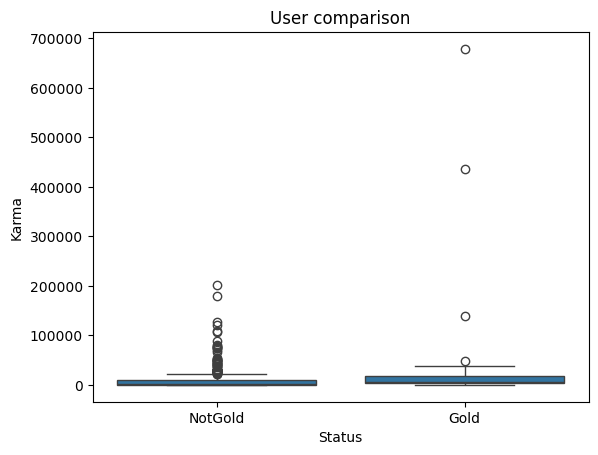

In [23]:
sns.boxplot(x='AuthorIsGold', y='Karma', data=df_users)
plt.title('User comparison')
plt.xlabel('Status')
plt.ylabel('Karma')
plt.xticks([0, 1], ['NotGold', 'Gold'])
plt.show()

In [24]:
# As we can see the majority of values are concentrated within 10000 but there are outliers up to 700000

In [25]:
top_authors = df_posts['UserID'].value_counts().head(10)
top_authors_with_names = top_authors.reset_index().merge(df_users[['UserID', 'Author','AuthorIsGold']], on='UserID')
print("Top 10 active users: \n", top_authors_with_names)

Top 10 active users: 
    UserID  count              Author  AuthorIsGold
0       4    699             CMelody           0.0
1       2    500            Amblonyx           0.0
2      39    350            RookOnzo           0.0
3      91    349      quesadillarito           0.0
4      62    349      The_Jean_Genie           0.0
5     344    300  HowToBeaGoodLeader           0.0
6      88    300    chief_dirtypants           0.0
7     151    300    higuysimonreddit           0.0
8      51    300              dack07           0.0
9      81    250        zebrahead110           0.0


In [26]:
# It is surprising ,but the most active users do not have a gold status

In [27]:
# Here are the most popular words 

In [50]:
import re
txt = ' '.join(df_posts['Text'])
words = re.findall(r'\w+', txt.lower())

In [81]:
com_word = {'it','you','i','at','here','is','although','up','for','this','with','him','they','she','be','have','a','the','am','as','to','and','that','of','in','s','was','he',
           'has','nt','do','not','did','like','on','but','his','when','so','what','when','just','if','about','would','think','my','or'}

In [82]:
from collections import Counter 
common_words = Counter(words).most_common(100)

In [83]:
# Deleting uninteresting words such as prepositions
for i in com_word:
    for k in range(len(common_words)-1):
        if common_words[k][0] == i:
            common_words.pop(k)

In [88]:
df_words = pd.DataFrame(common_words, columns = ['Word','Quantity'])

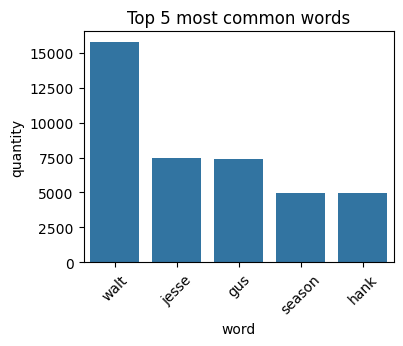

In [105]:
plt.figure(figsize=(4, 3))
sns.barplot(x='Word', y='Quantity', data=df_words.head(5))
plt.title('Top 5 most common words')
plt.xlabel('word')
plt.ylabel('quantity')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# Users mostly speaking about main characters: Walter and Jess, also they do not forget about Gustavo and Hank